# Can you predict local epidemics of dengue fever?

Dengue fever is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash, and muscle and joint pain. In severe cases, dengue fever can cause severe bleeding, low blood pressure, and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.


![image](0f3a28954438c90e1935d61f3f2c23e906feb39a.jpg)

### Dengue has become a global problem since the Second World War and is common in more than 110 countries. Each year between 50 and 528 million people are infected and approximately 10,000 to 20,000 die. (Wikipedia)

# 1. Getting data

In [2]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import StandardScaler


import xgboost as xgb
%matplotlib inline

In [3]:
# Call up the data

features = pd.read_csv('dengue_features_train.csv')
target = pd.read_csv('dengue_labels_train.csv')
df = pd.merge(features, target, on=['city','year','weekofyear'])

In [4]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [5]:
df.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,295.807143,307.8,292.3,36.90,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,4


# 2. Checking Data

### This data is separated by two different cities, San Juan and Iquitos. Not just different conditions are different, but also time series of data are different. Therefore, I separate two datas to observe and build models.

In [6]:
#  split with different city

iq_df = df[df['city'] == 'iq'].copy()
sj_df = df[df['city']=='sj'].copy()

iq_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [7]:
sj_df.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,2008-04-15,0.00180,NaN,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,298.692857,294.280000,300.9,295.9,2.17,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5


In [8]:
sj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
city                                     936 non-null object
year                                     936 non-null int64
weekofyear                               936 non-null int64
week_start_date                          936 non-null object
ndvi_ne                                  745 non-null float64
ndvi_nw                                  887 non-null float64
ndvi_se                                  917 non-null float64
ndvi_sw                                  917 non-null float64
precipitation_amt_mm                     927 non-null float64
reanalysis_air_temp_k                    930 non-null float64
reanalysis_avg_temp_k                    930 non-null float64
reanalysis_dew_point_temp_k              930 non-null float64
reanalysis_max_air_temp_k                930 non-null float64
reanalysis_min_air_temp_k                930 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [9]:
# Before spliting train and test set, I want to make week start date as datetime type, and change it to index.
iq_df['week_start_date'] = pd.to_datetime(iq_df['week_start_date'])
sj_df['week_start_date'] = pd.to_datetime(sj_df['week_start_date'])

iq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 936 to 1455
Data columns (total 25 columns):
city                                     520 non-null object
year                                     520 non-null int64
weekofyear                               520 non-null int64
week_start_date                          520 non-null datetime64[ns]
ndvi_ne                                  517 non-null float64
ndvi_nw                                  517 non-null float64
ndvi_se                                  517 non-null float64
ndvi_sw                                  517 non-null float64
precipitation_amt_mm                     516 non-null float64
reanalysis_air_temp_k                    516 non-null float64
reanalysis_avg_temp_k                    516 non-null float64
reanalysis_dew_point_temp_k              516 non-null float64
reanalysis_max_air_temp_k                516 non-null float64
reanalysis_min_air_temp_k                516 non-null float64
reanalysis_precip_amt_

In [10]:
# I will set datetime to index, so I can do easily on plot and check diff() of weather.
iq_df.set_index('week_start_date', inplace=True)
sj_df.set_index('week_start_date', inplace=True)

#### This data is organized by time series. I will fill missing values with last observations because this is weather data. Weather data does not change dramatically over a week, so method 'ffill' is reasonable for filling missing values.  Moreover, I will split train set by first 80% of each city's data. After that, I will create columns to see how some features are changed on each week. 

In [11]:
# fill with previous week's value
iq_df.fillna(method='ffill', inplace=True)

sj_df.fillna(method='ffill', inplace=True)

In [12]:
# train test split with date

iq_train_size = int(len(iq_df) * .8)
sj_train_size = int(len(sj_df) * .8)

print(iq_train_size, sj_train_size)

416 748


In [13]:
iq_train = iq_df.iloc[:iq_train_size, :]
iq_test = iq_df.iloc[iq_train_size:, :]

sj_train = sj_df.iloc[:sj_train_size, :]
sj_test = sj_df.iloc[sj_train_size:, :]

In [14]:
iq_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416 entries, 2000-07-01 to 2008-06-24
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
ndvi_ne                                  416 non-null float64
ndvi_nw                                  416 non-null float64
ndvi_se                                  416 non-null float64
ndvi_sw                                  416 non-null float64
precipitation_amt_mm                     416 non-null float64
reanalysis_air_temp_k                    416 non-null float64
reanalysis_avg_temp_k                    416 non-null float64
reanalysis_dew_point_temp_k              416 non-null float64
reanalysis_max_air_temp_k                416 non-null float64
reanalysis_min_air_temp_k                416 non-null float64
reanalysis_precip_amt_kg_per_m2          416 non-null float64
reanalysis_re

In [15]:
print(iq_train.info(), '\n' , sj_train.info()) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416 entries, 2000-07-01 to 2008-06-24
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
ndvi_ne                                  416 non-null float64
ndvi_nw                                  416 non-null float64
ndvi_se                                  416 non-null float64
ndvi_sw                                  416 non-null float64
precipitation_amt_mm                     416 non-null float64
reanalysis_air_temp_k                    416 non-null float64
reanalysis_avg_temp_k                    416 non-null float64
reanalysis_dew_point_temp_k              416 non-null float64
reanalysis_max_air_temp_k                416 non-null float64
reanalysis_min_air_temp_k                416 non-null float64
reanalysis_precip_amt_kg_per_m2          416 non-null float64
reanalysis_re

## 2-2, EDA

#### First, check my target, total cases.

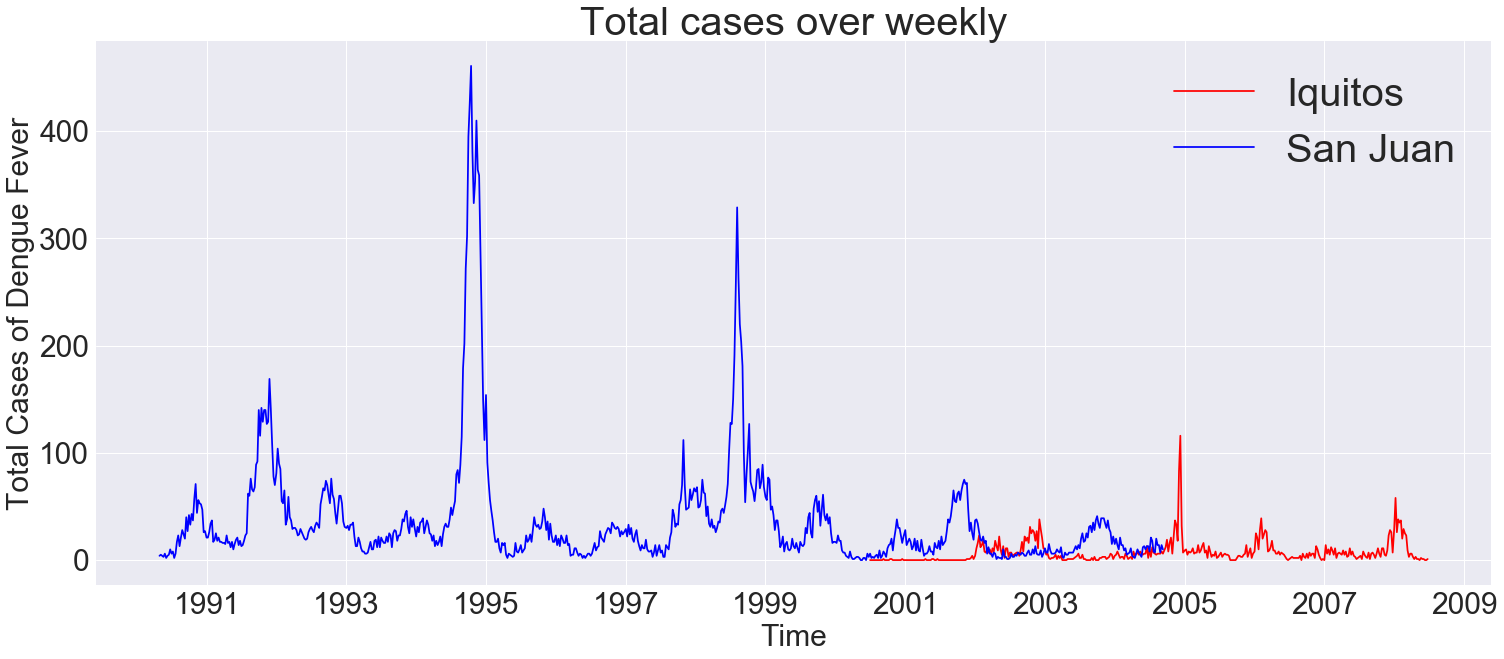

In [16]:


fig, ax = plt.subplots(figsize=(25, 10))
plt.plot('total_cases', data=iq_train, label='Iquitos', color='r')
plt.plot('total_cases', data=sj_train, label='San Juan', color ='b')


plt.legend(loc=1, prop={'size': 40})
plt.xlabel('Time', fontsize=30)
plt.ylabel('Total Cases of Dengue Fever', fontsize=30)
plt.title('Total cases over weekly', fontsize=40)
ax.tick_params(labelsize=30)
plt.grid(True);


#### In San Juan, there are some outbreak dengue fever cases on 1995 and 1998, and In Iquitos, there are outbreak dengue fever cases on 2005. I can see that Dengue fever is new disease in Iquitos and started to occured in 2000.

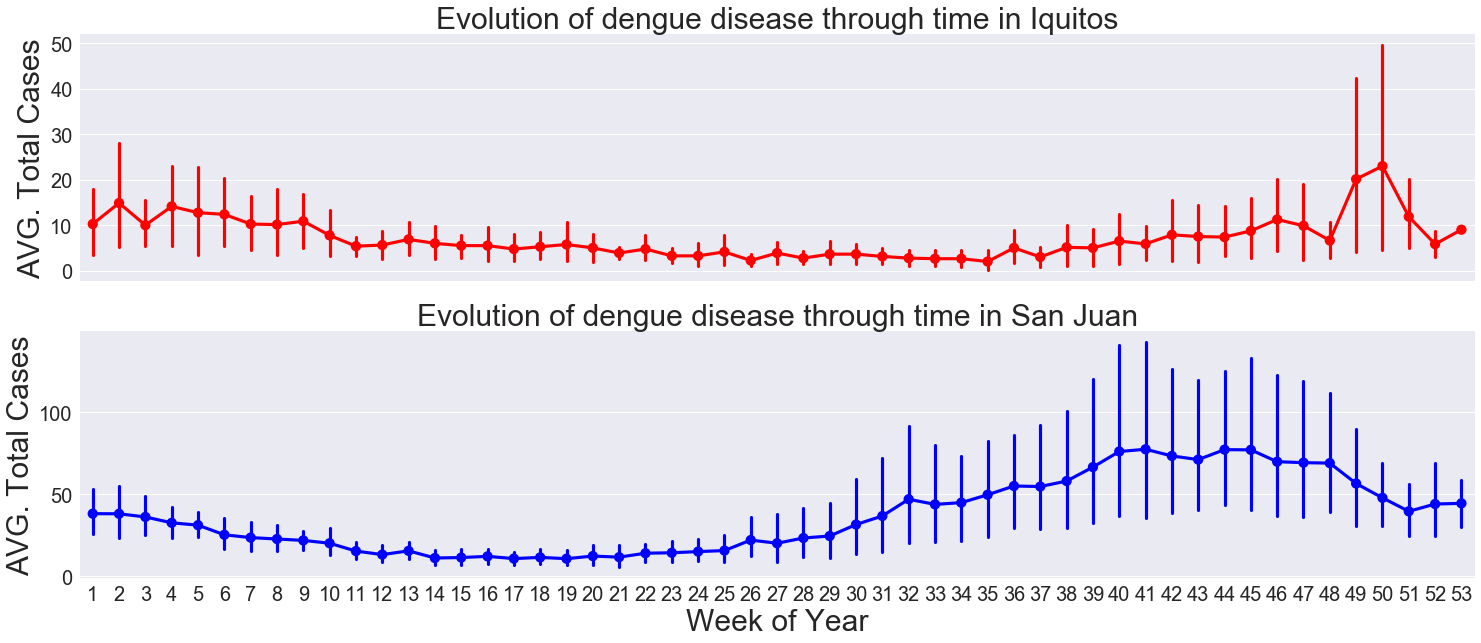

In [17]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(25, 10), sharex=True)

ax1 = sns.pointplot('weekofyear','total_cases', data=iq_train, color='r', label='iq_cases', ax=ax1)
ax1.set_title("Evolution of dengue disease through time in Iquitos", fontsize=30)
ax1.set_ylabel('AVG. Total Cases', fontsize=30)
ax1.set_xlabel('')
ax1.tick_params(labelsize=20)


ax2 = sns.pointplot('weekofyear','total_cases', data=sj_train, color='b', label= 'sj_cases', ax=ax2)

ax2.set_title("Evolution of dengue disease through time in San Juan", fontsize=30)
ax2.set_xlabel('Week of Year', fontsize=30)
ax2.set_ylabel('AVG. Total Cases', fontsize=30)
ax2.tick_params(labelsize=20);

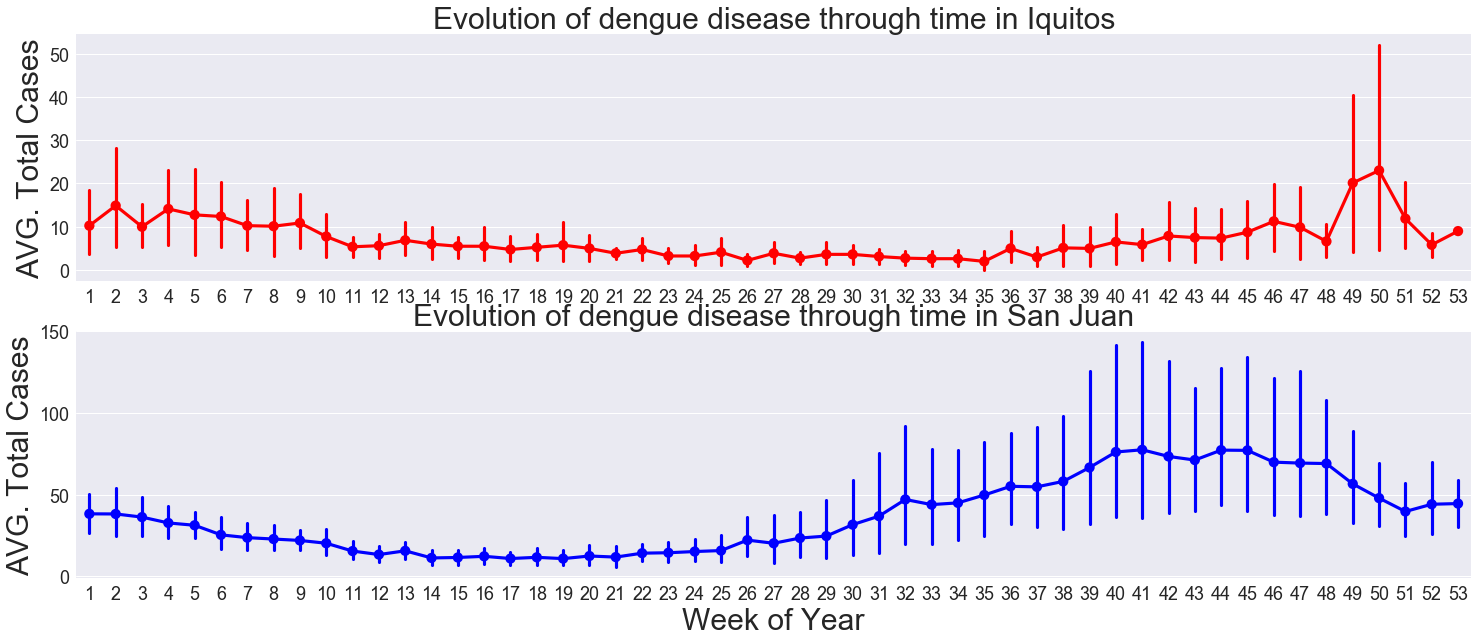

In [18]:
fig, ax = plt.subplots(figsize=(25, 10), sharex=True, sharey=True)
plt.subplot(211)
sns.pointplot('weekofyear','total_cases', data=iq_train, color='r', label='iq_cases')
plt.title("Evolution of dengue disease through time in Iquitos", fontsize=30)
plt.ylabel('AVG. Total Cases', fontsize=30)
plt.xlabel('')
plt.tick_params(labelsize=18)



plt.subplot(212)
sns.pointplot('weekofyear','total_cases', data=sj_train, color='b', label= 'sj_cases')
plt.title("Evolution of dengue disease through time in San Juan", fontsize=30)
plt.xlabel('Week of Year', fontsize=30)
plt.ylabel('AVG. Total Cases', fontsize=30)
plt.tick_params(labelsize=18);

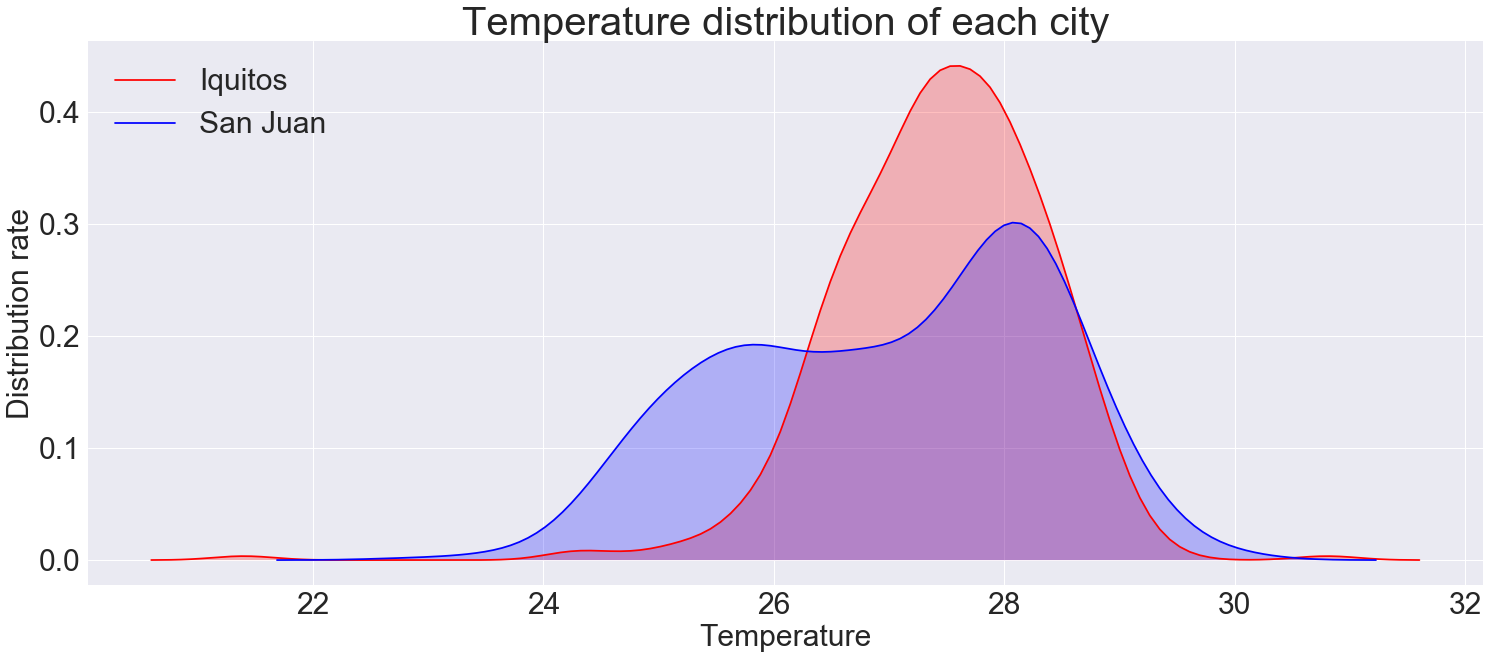

In [19]:
fig, ax = plt.subplots(figsize=(25,10))

ax = sns.kdeplot(iq_train.station_avg_temp_c, shade=True, color='r', label='Iquitos')

ax = sns.kdeplot(sj_train.station_avg_temp_c, shade=True,color='b', label='San Juan')

plt.xlabel('Temperature', fontsize=30)
plt.ylabel('Distribution rate', fontsize=30)
plt.title('Temperature distribution of each city', fontsize=40)
plt.legend(loc=2, prop={'size': 30})
plt.tick_params(labelsize=30);

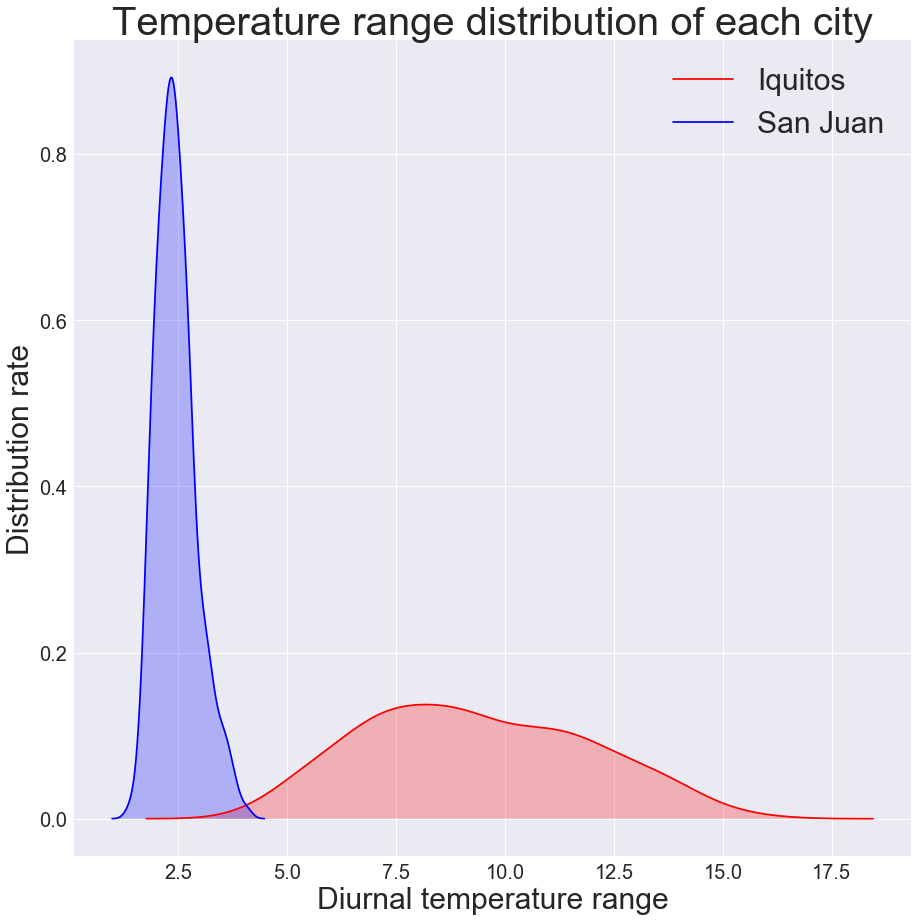

In [20]:
fig, ax = plt.subplots(figsize=(15,15))

ax = sns.kdeplot(iq_train.reanalysis_tdtr_k, shade=True, color='r', label='Iquitos')
ax = sns.kdeplot(sj_train.reanalysis_tdtr_k, shade=True,color='b', label='San Juan')


plt.xlabel('Diurnal temperature range', fontsize=30)
plt.ylabel('Distribution rate', fontsize=30)
plt.title('Temperature range distribution of each city', fontsize=40)
plt.legend(fontsize=30)
plt.tick_params(labelsize=20);

#### Even though two cities' temperature conditions are fell into 20-32 Cel. degree, they have different relationship on diurnal temperature range. San Juan's diurnal temperature condition is highly populated between 0-5 degree.

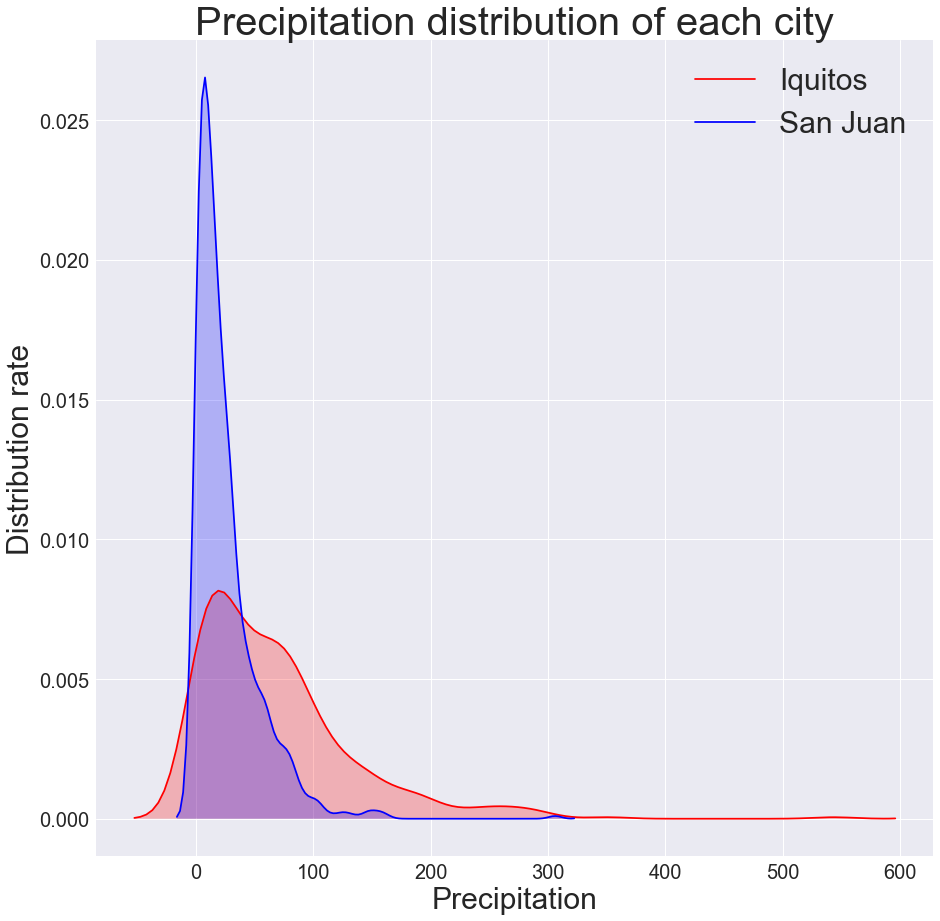

In [21]:
fig, ax = plt.subplots(figsize=(15,15))

ax = sns.kdeplot(iq_train.station_precip_mm, shade=True, color='r', label='Iquitos')
ax = sns.kdeplot(sj_train.station_precip_mm, shade=True,color='b', label='San Juan')


plt.xlabel('Precipitation', fontsize=30)
plt.ylabel('Distribution rate', fontsize=30)
plt.title('Precipitation distribution of each city', fontsize=40)
plt.legend(fontsize=30)
plt.tick_params(labelsize=20);

#### Precipitation comparsion also show similar results.

In [22]:
iq_train.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

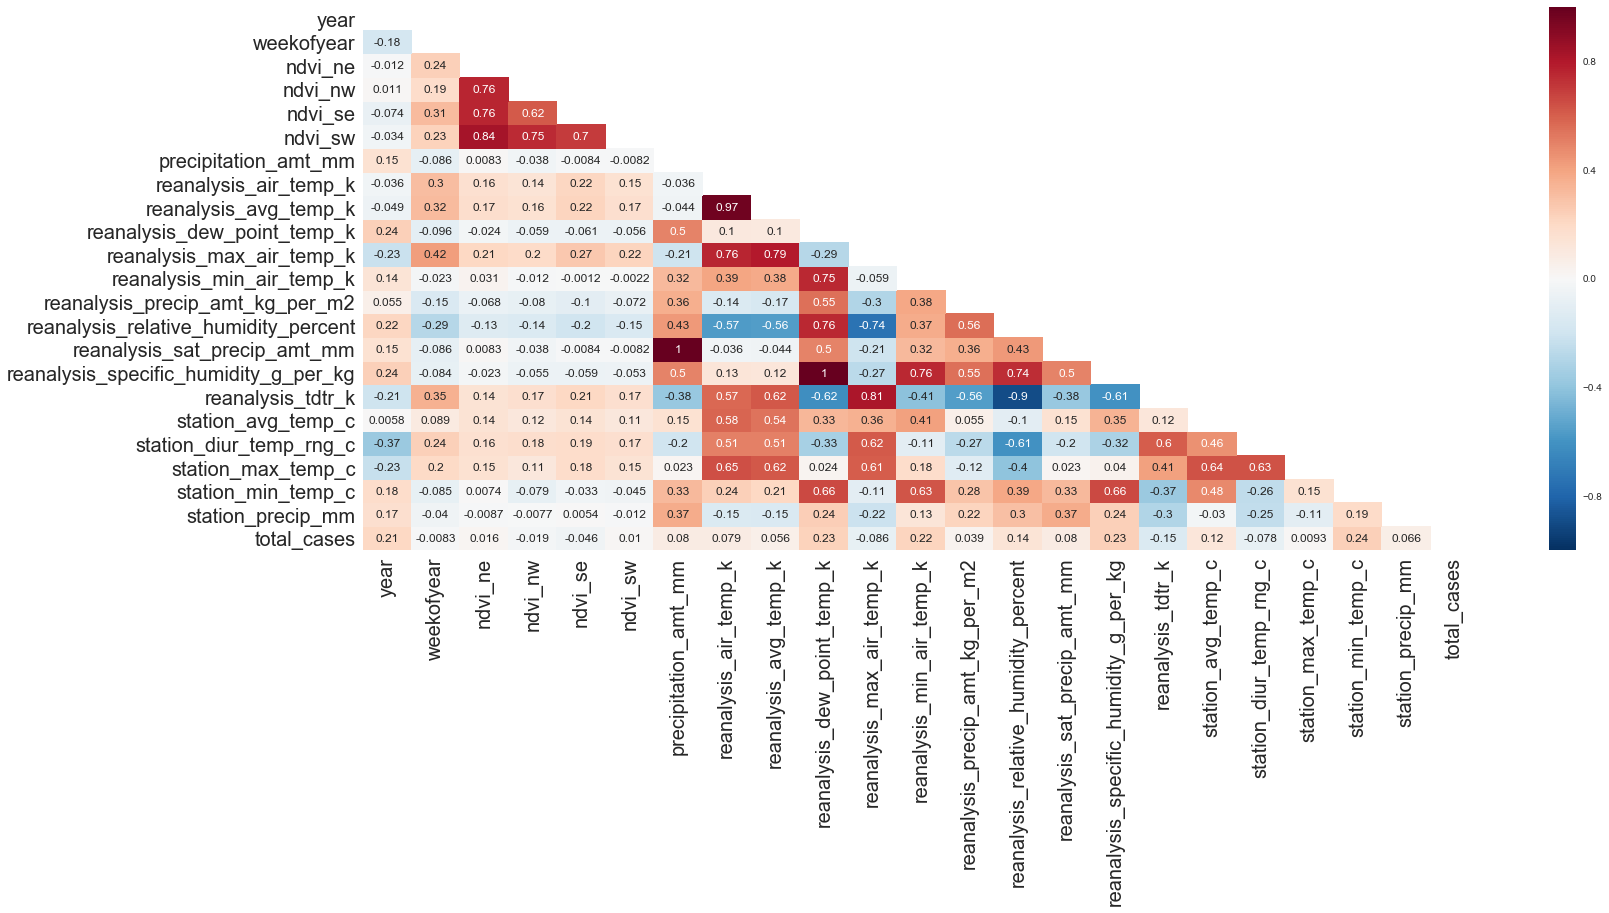

In [23]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(25, 10))
corr= iq_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr,mask=mask, annot=True)
ax.tick_params(labelsize=20);

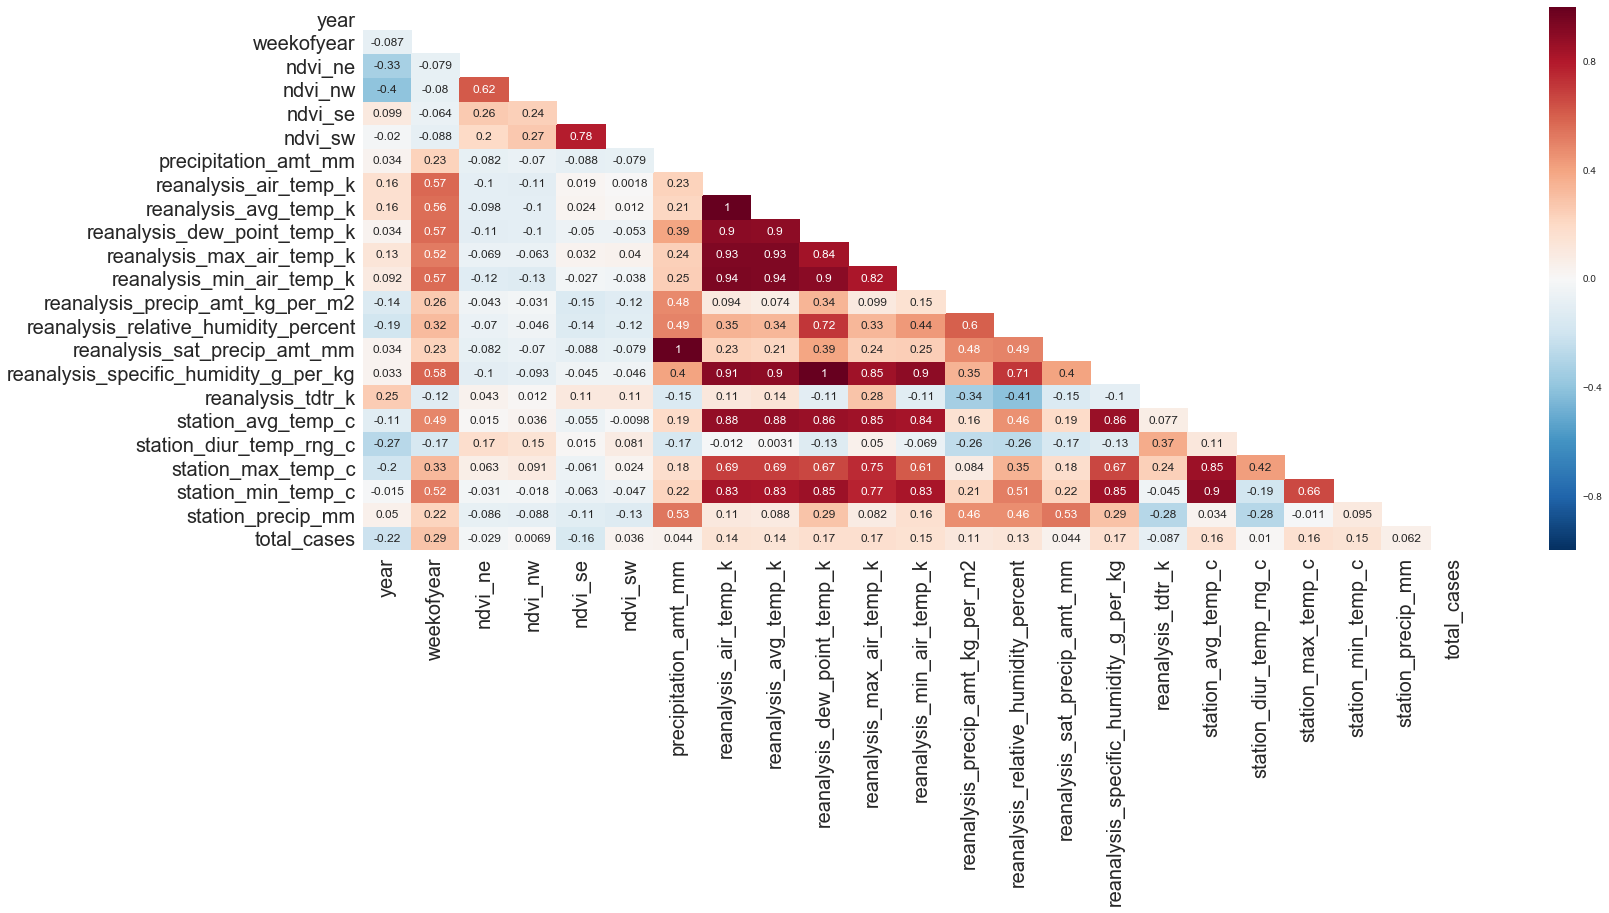

In [24]:

fig, ax = plt.subplots(figsize=(25, 10))
corr= sj_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr,mask=mask, annot=True)
ax.tick_params(labelsize=20);

In [25]:
df_train = pd.concat((sj_train, iq_train), axis=0)

In [26]:
df_test = pd.concat((sj_test, iq_test), axis=0)

In [27]:
df_train = pd.concat([df_train.drop("city", axis=1),pd.get_dummies(df_train['city'])],axis=1)
df_test = pd.concat([df_test.drop("city", axis=1),pd.get_dummies(df_test['city'])],axis=1)                        

In [28]:
# re-assign X_train, test and y_train, test after missing value treatment
X_train = df_train.drop('total_cases', axis=1)
y_train = df_train['total_cases']

X_test = df_test.drop('total_cases', axis=1)
y_test = df_test['total_cases']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1164, 24) (292, 24) (1164,) (292,)


In [29]:
df_test.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,iq,sj
week_start_date,,,,,,,,,,,,,,,,,,,,,,,,,
2004-09-16,2004,38,0.040150,0.074925,0.094871,0.139443,52.29,301.100000,301.257143,297.304286,303.3,299.3,16.00,80.032857,52.29,18.904286,2.428571,28.642857,6.114286,32.2,24.4,32.8,13,0,1
2004-09-23,2004,39,0.040150,-0.067450,0.225257,0.233200,245.73,299.798571,299.957143,297.081429,302.9,297.7,254.95,85.330000,245.73,18.645714,2.542857,27.228571,6.057143,33.9,23.3,158.2,27,0,1
2004-09-30,2004,40,0.033475,0.007625,0.243580,0.178633,10.06,301.028571,301.207143,296.478571,303.6,298.7,8.57,76.471429,10.06,17.964286,3.671429,29.142857,8.085714,34.4,24.4,21.8,13,0,1
2004-10-07,2004,41,-0.016800,0.025267,0.090471,0.058367,34.73,300.680000,300.678571,296.584286,302.5,298.9,35.70,78.477143,34.73,18.072857,2.557143,28.285714,6.214286,31.7,24.4,24.4,18,0,1
2004-10-14,2004,42,-0.016800,0.093750,0.236029,0.213871,83.20,300.508571,300.678571,296.864286,303.4,298.6,41.40,80.665714,83.20,18.402857,3.157143,28.128571,6.185714,32.2,23.9,41.4,16,0,1


# Baseline

In [30]:
baseline = y_train.mean()
baseline

26.027491408934708

In [31]:


dr = DummyRegressor(strategy='mean')
dr.fit(X_train,y_train)
print("baseline R^2 score is ",dr.score(X_test,y_test))

y_baseline = dr.predict(X_test)

print("Baseline MAE = ",mean_absolute_error(y_test, y_baseline))

baseline R^2 score is  -0.0627317258268
Baseline MAE =  21.0003883632


### So, my model needs to overcome MAE of 21.

# Modeling

In [32]:

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [33]:

# I will use ElasticNet to see both ridge and lasso.
en = ElasticNet()
params_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'alpha': np.linspace(0.1, 100, 10),
    'l1_ratio': np.linspace(0.1, 0.99, 10)
}
en_model = GridSearchCV(en, params_grid,cv=20, n_jobs=3, verbose=1)
en_model.fit(Xs_train, y_train)


print("best params", en_model.best_params_)
y_pred = en_model.predict(Xs_test)
print(mean_absolute_error(y_test,y_pred))

Fitting 20 folds for each of 400 candidates, totalling 8000 fits


[Parallel(n_jobs=3)]: Done 2586 tasks      | elapsed:    3.5s


best params {'alpha': 22.300000000000004, 'fit_intercept': False, 'l1_ratio': 0.79222222222222216, 'normalize': True}
19.2842465753


[Parallel(n_jobs=3)]: Done 8000 out of 8000 | elapsed:   10.1s finished


### Gradient Boosting Regressor

In [34]:


gbr = GradientBoostingRegressor()
gbr_params = {
    'n_estimators': range(10,160, 10),
    'max_depth': range(5,15),
    'max_features': ['auto','sqrt','log2', None]
    
}
gbr_model = GridSearchCV(gbr, param_grid=gbr_params, cv=10, n_jobs=3, verbose=1)
gbr_model.fit(Xs_train, y_train)

print("best params", gbr_model.best_params_)
gbr_pred = gbr_model.predict(Xs_test)
print(mean_absolute_error(y_test, gbr_pred))


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=3)]: Done 142 tasks      | elapsed:   10.5s
[Parallel(n_jobs=3)]: Done 699 tasks      | elapsed:   36.2s
[Parallel(n_jobs=3)]: Done 1276 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 1941 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done 2919 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done 3638 tasks      | elapsed:  6.0min
[Parallel(n_jobs=3)]: Done 4380 tasks      | elapsed:  8.9min
[Parallel(n_jobs=3)]: Done 5305 tasks      | elapsed: 11.8min


best params {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
14.6744993538


[Parallel(n_jobs=3)]: Done 6000 out of 6000 | elapsed: 15.1min finished


In [35]:
df_test['pred']= gbr_pred.round()

sj_plot = df_test[df_test['sj']==1]

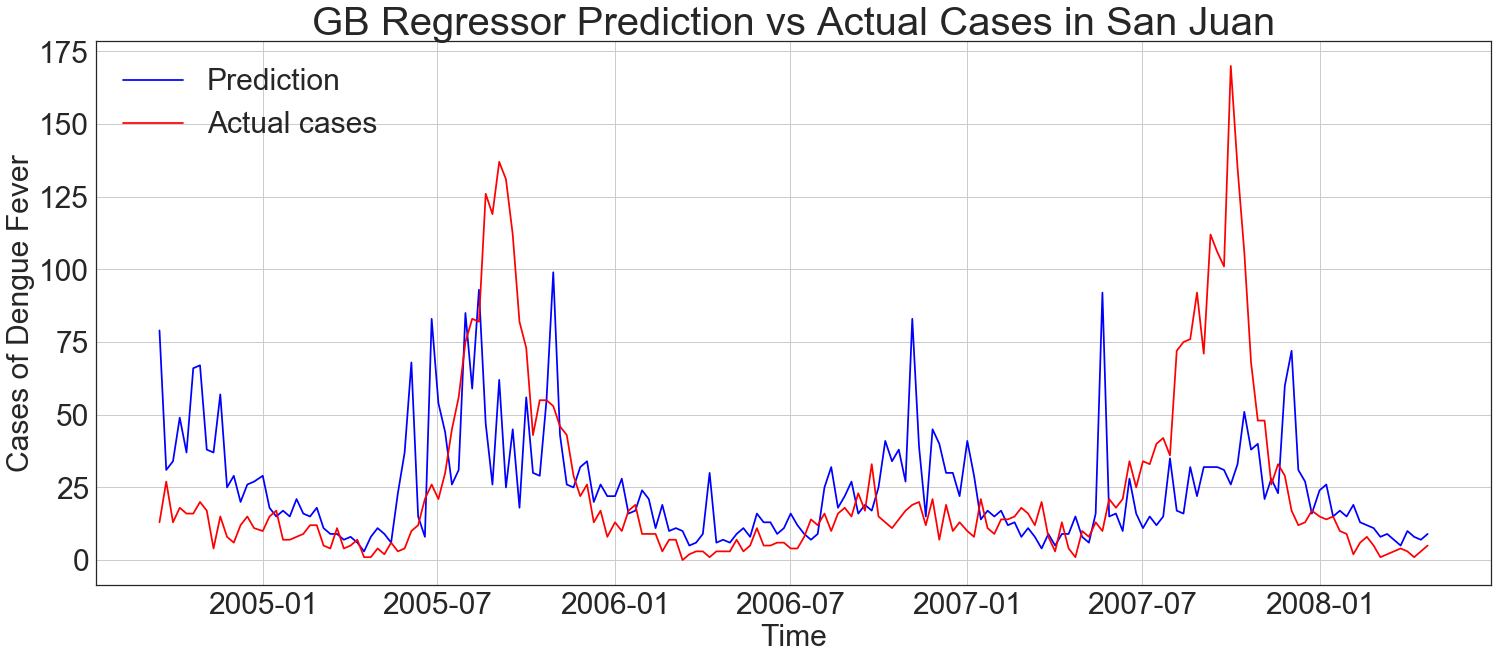

In [36]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot('pred', data=sj_plot, label='Prediction', color='b')
plt.plot('total_cases',data=sj_plot, label='Actual cases', color ='r')


plt.legend(loc=2, prop={'size': 30})
plt.xlabel('Time', fontsize=30)
plt.ylabel('Cases of Dengue Fever', fontsize=30)
plt.title('GB Regressor Prediction vs Actual Cases in San Juan', fontsize=40)
ax.tick_params(labelsize=30)
plt.grid(True);

In [37]:
iq_plot = df_test[df_test['iq']==1]

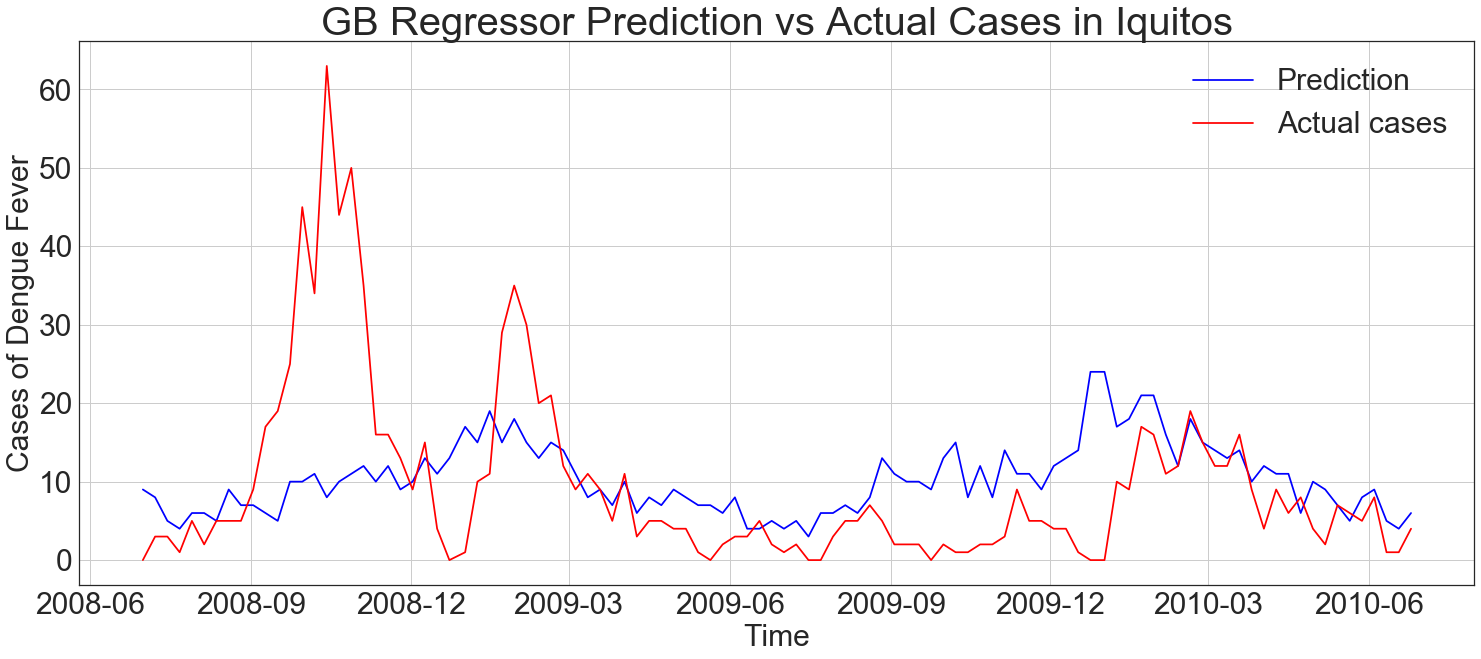

In [38]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot('pred', data=iq_plot, label='Prediction', color='b')
plt.plot('total_cases',data=iq_plot, label='Actual cases', color ='r')


plt.legend(loc=1, prop={'size': 30})
plt.xlabel('Time', fontsize=30)
plt.ylabel('Cases of Dengue Fever', fontsize=30)
plt.title('GB Regressor Prediction vs Actual Cases in Iquitos', fontsize=40)
ax.tick_params(labelsize=30)
plt.grid(True);

In [39]:
X_train.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'iq', 'sj'],
      dtype='object')

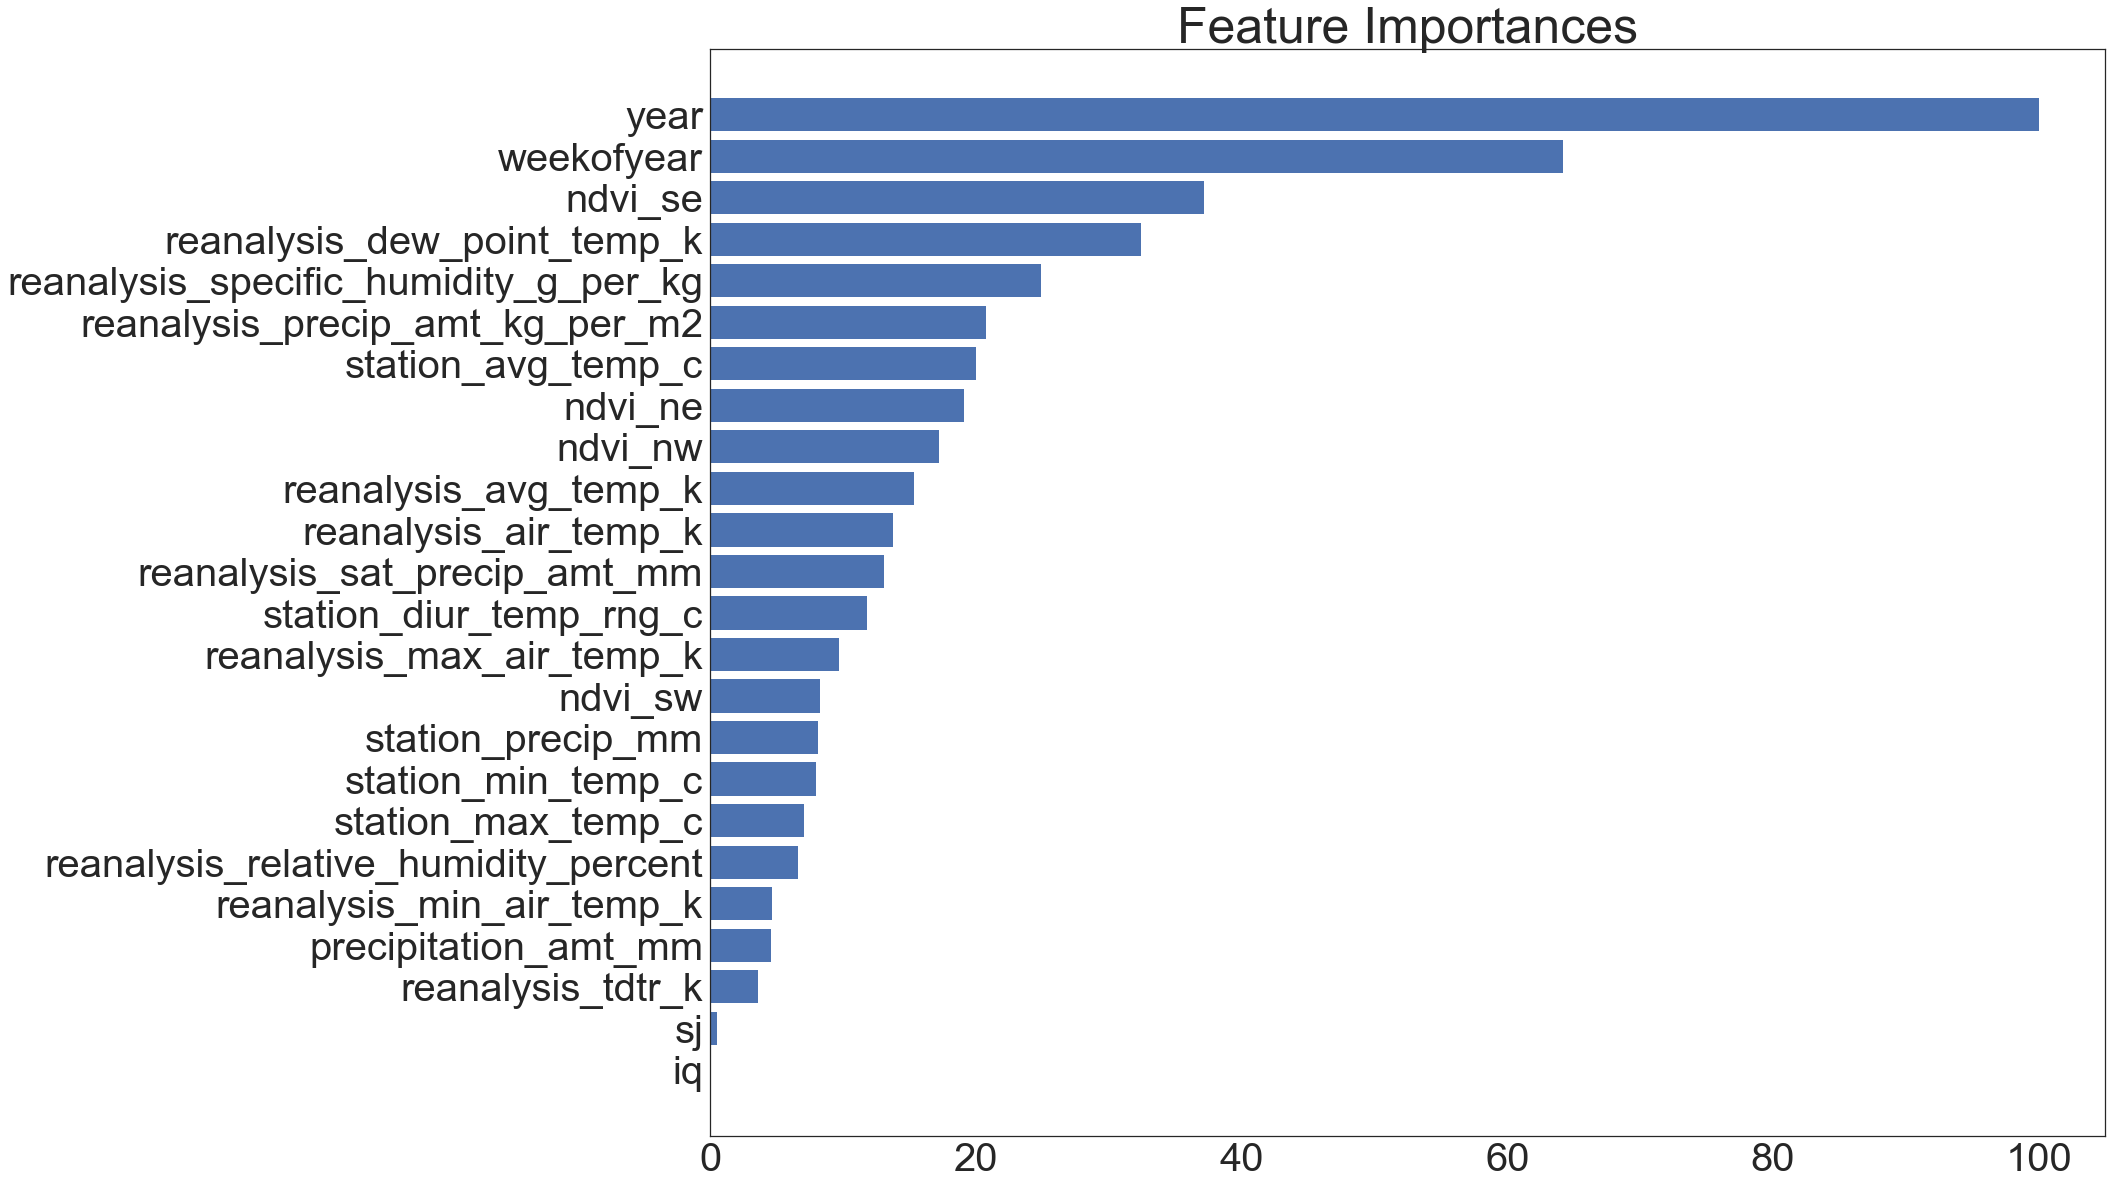

In [40]:
fig, ax = plt.subplots(figsize=(25,20))
gbr.fit(Xs_train, y_train)
feature_importance = gbr.feature_importances_
feature_importance = 100 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
sel_col = X_train.columns
plt.yticks(pos, sel_col[sorted_idx])
plt.title('Feature Importances', fontsize=50)
ax.tick_params(labelsize=40);


### XGBOOST MODEL

In [41]:
xgr = xgb.XGBRegressor()




xgb_params = {
    'max_depth': range(5,10),
    'min_child_weight': range(4,9),
    'subsample':[0.7, 0.9, 1],
    'n_estimators': range(100,300,10)
}

xgb_model = GridSearchCV(xgr, xgb_params,verbose=1, cv=10, n_jobs=3)
xgb_model.fit(Xs_train, y_train)


print("best params", xgb_model.best_params_)
xgb_pred = xgb_model.predict(Xs_test)
print('MAE is ', mean_absolute_error(y_test, xgb_pred))



Fitting 10 folds for each of 1500 candidates, totalling 15000 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.9s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   14.3s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   43.2s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:  3.3min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed:  4.5min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed:  5.9min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed:  7.8min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed:  9.9min
[Parallel(n_jobs=3)]: Done 6044 tasks      | elapsed: 12.2min
[Parallel(n_jobs=3)]: Done 7194 tasks      | elapsed: 15.2min
[Parallel(n_jobs=3)]: Done 8444 tasks      | elapsed: 18.3min
[Parallel(n_jobs=3)]: Done 9794 tasks      | elapsed: 21.9min
[Parallel(n_jobs=3)]: Done 11244 tasks      | elapsed: 26.3min
[Parallel(n_jobs=3)]: Done 12794 tasks      | elapsed: 31.2min
[Parallel(

best params {'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 100, 'subsample': 0.7}
MAE is  14.4697628988


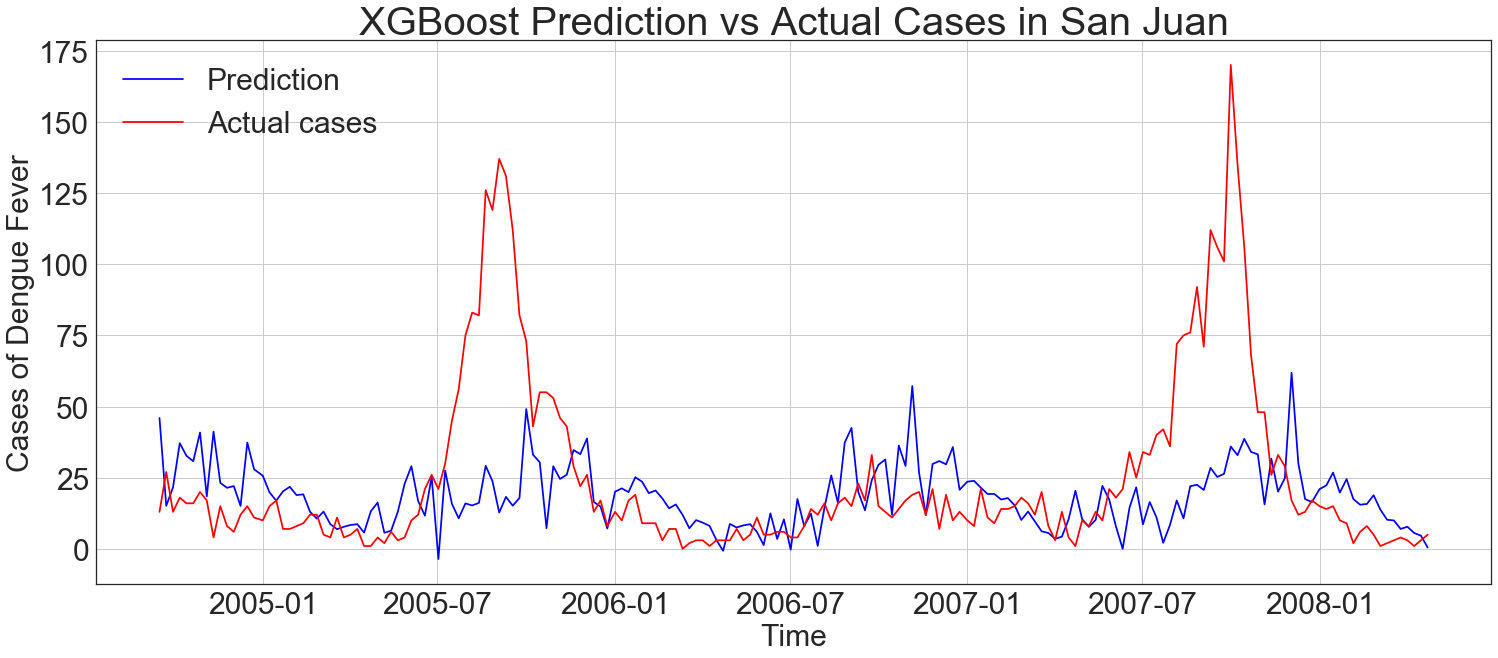

In [42]:
df_test['pred']= xgb_pred
sj_plot = df_test[df_test['sj']==1]

fig, ax = plt.subplots(figsize=(25, 10))
plt.plot('pred', data=sj_plot, label='Prediction', color='b')
plt.plot('total_cases',data=sj_plot, label='Actual cases', color ='r')


plt.legend(loc=2, prop={'size': 30})
plt.xlabel('Time', fontsize=30)
plt.ylabel('Cases of Dengue Fever', fontsize=30)
plt.title('XGBoost Prediction vs Actual Cases in San Juan', fontsize=40)
ax.tick_params(labelsize=30)
plt.grid(True);

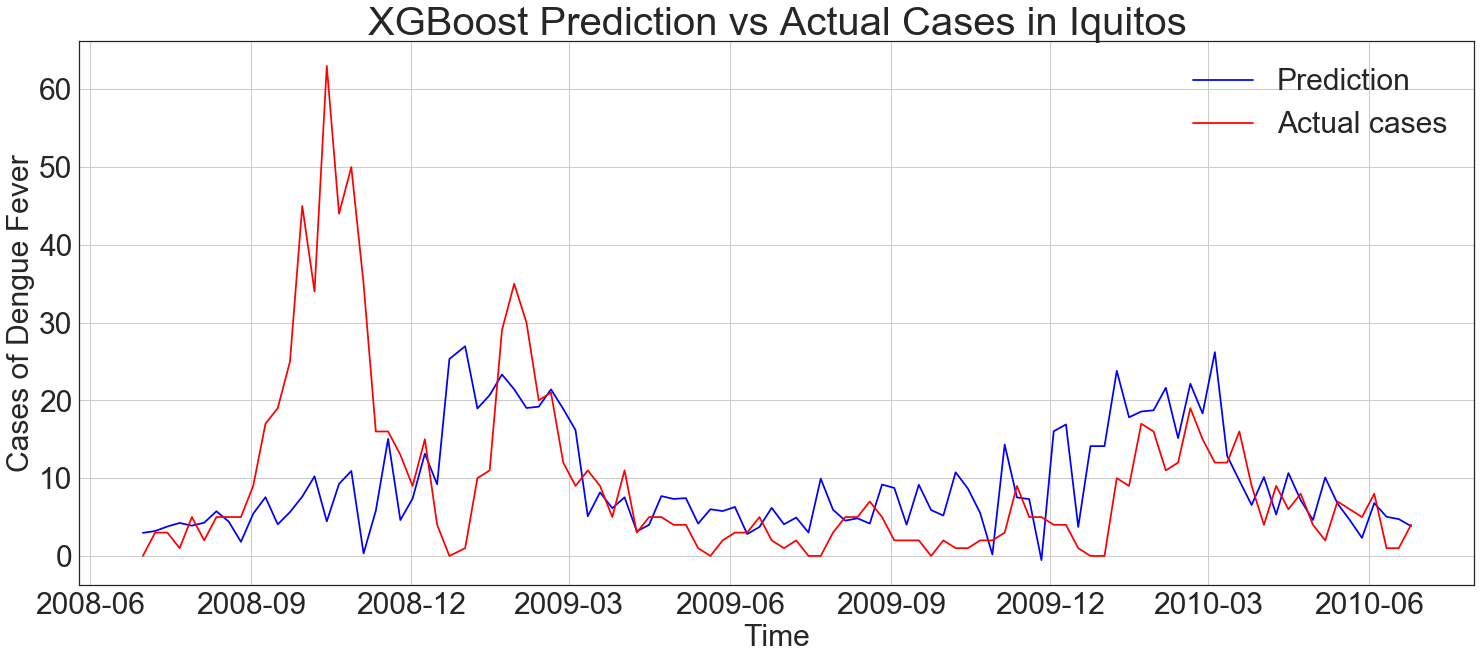

In [43]:
iq_plot = df_test[df_test['iq']==1]

fig, ax = plt.subplots(figsize=(25, 10))
plt.plot('pred', data=iq_plot, label='Prediction', color='b')
plt.plot('total_cases',data=iq_plot, label='Actual cases', color ='r')


plt.legend(loc=1, prop={'size': 30})
plt.xlabel('Time', fontsize=30)
plt.ylabel('Cases of Dengue Fever', fontsize=30)
plt.title('XGBoost Prediction vs Actual Cases in Iquitos', fontsize=40)
ax.tick_params(labelsize=30)
plt.grid(True);

{'f0': 174, 'f4': 51, 'f1': 120, 'f11': 17, 'f16': 22, 'f2': 24, 'f20': 18, 'f18': 17, 'f9': 38, 'f15': 24, 'f10': 15, 'f21': 19, 'f7': 23, 'f6': 23, 'f19': 8, 'f8': 4, 'f3': 15, 'f17': 25, 'f5': 15, 'f13': 6, 'f12': 17}


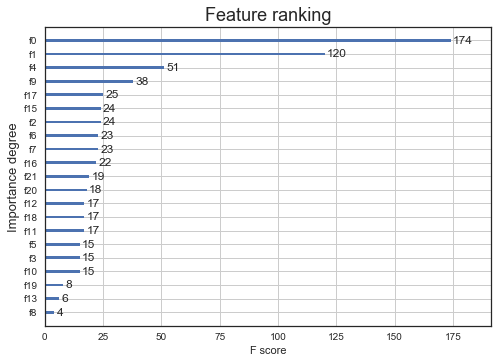

In [44]:
model = xgr.fit(Xs_train, y_train)
print(model.booster().get_score(importance_type='weight'))
xgb.plot_importance(model)

plt.title('Feature ranking', fontsize = 18)
plt.ylabel('Importance degree', fontsize = 13)


### Adaboost Regressor(ensemble)

In [47]:
adr = AdaBoostRegressor(base_estimator=gbr)




adr_params = {
    'base_estimator__max_depth':range(1,10),
    'base_estimator__max_features':['auto', 'log2', None], 
    'n_estimators' : range(10, 200, 50),
    'loss' : ['linear', 'square', 'exponential']
}

adr_model = GridSearchCV(adr, adr_params,verbose=1, cv=3, n_jobs=3)
adr_model.fit(Xs_train, y_train)


print("best params", adr_model.best_params_)
adr_pred = adr_model.predict(Xs_test)
print('MAE is ', mean_absolute_error(y_test, adr_pred))

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   19.8s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed: 11.8min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 41.7min
[Parallel(n_jobs=3)]: Done 972 out of 972 | elapsed: 63.5min finished


best params {'base_estimator__max_depth': 6, 'base_estimator__max_features': None, 'loss': 'linear', 'n_estimators': 10}
MAE is  14.599974368


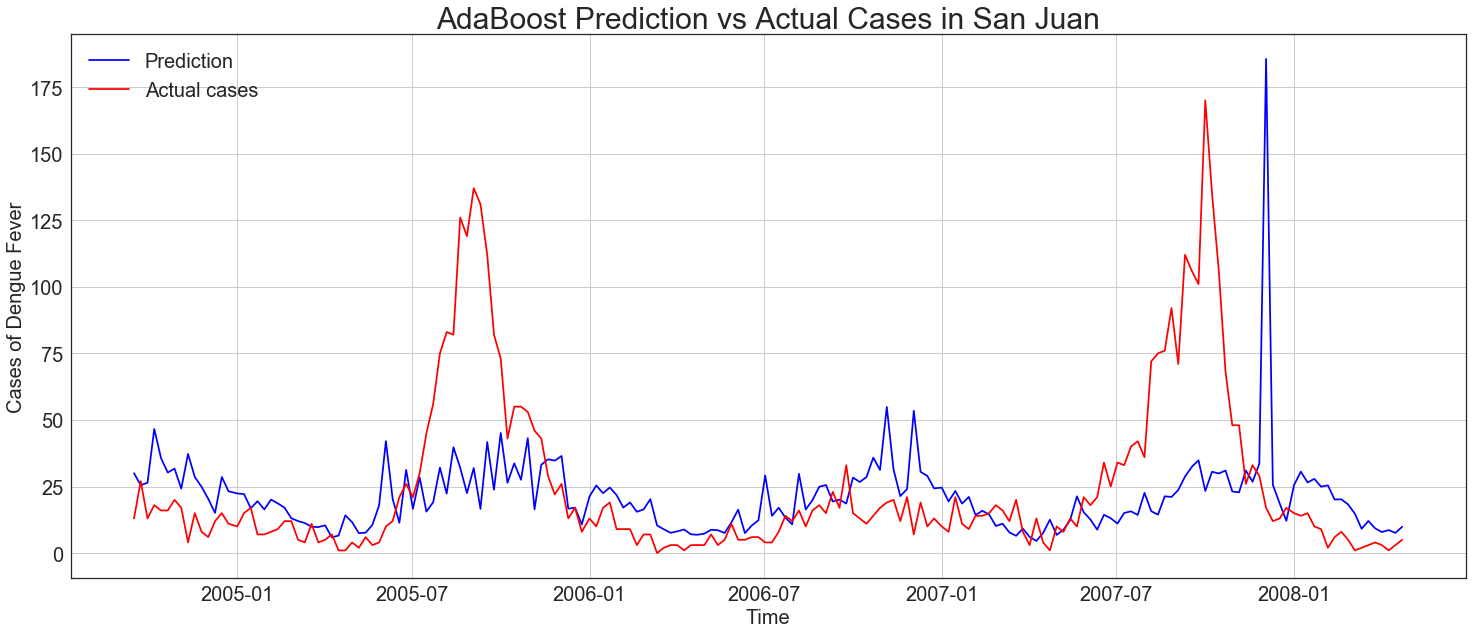

In [48]:
df_test['pred_adr']= adr_pred
sj_plot = df_test[df_test['sj']==1]

fig, ax = plt.subplots(figsize=(25, 10))
plt.plot('pred_adr', data=sj_plot, label='Prediction', color='b')
plt.plot('total_cases',data=sj_plot, label='Actual cases', color ='r')


plt.legend(loc=2, prop={'size': 20})
plt.xlabel('Time', fontsize=20)
plt.ylabel('Cases of Dengue Fever', fontsize=20)
plt.title('AdaBoost Prediction vs Actual Cases in San Juan', fontsize=30)
ax.tick_params(labelsize=20)
plt.grid(True);

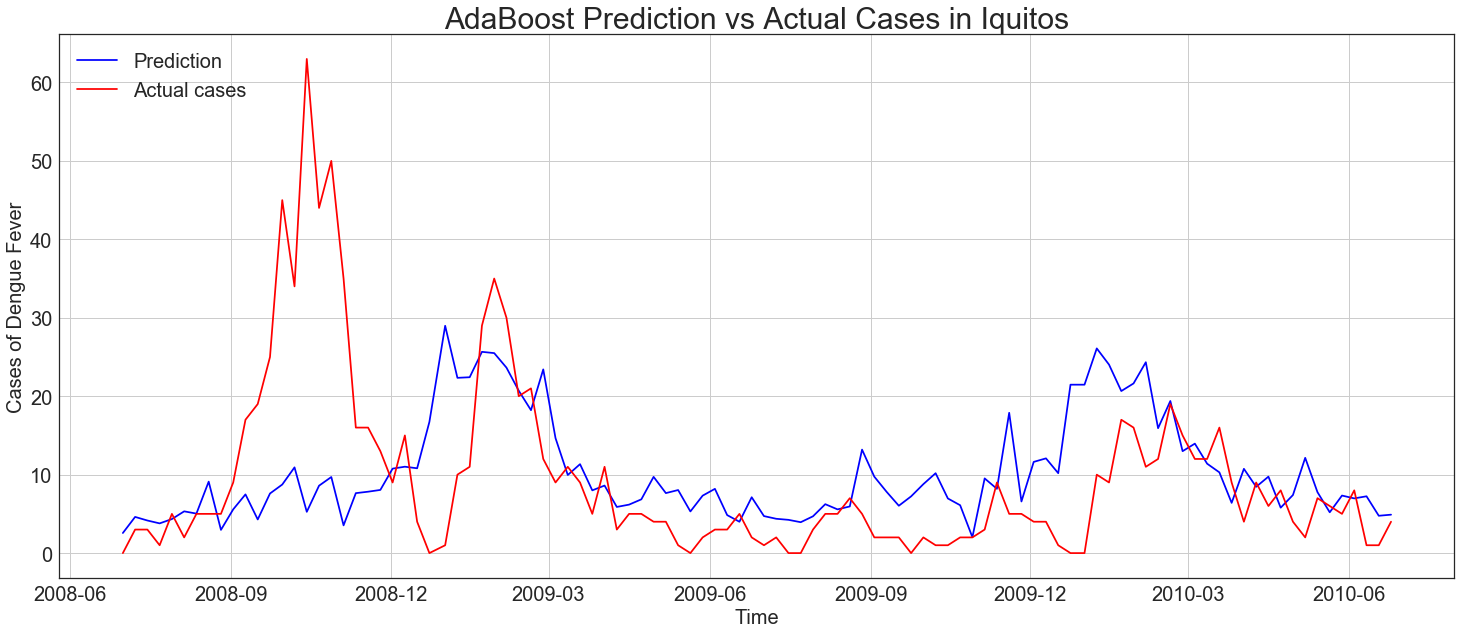

In [49]:

iq_plot = df_test[df_test['iq']==1]

fig, ax = plt.subplots(figsize=(25, 10))
plt.plot('pred_adr', data=iq_plot, label='Prediction', color='b')
plt.plot('total_cases',data=iq_plot, label='Actual cases', color ='r')


plt.legend(loc=2, prop={'size': 20})
plt.xlabel('Time', fontsize=20)
plt.ylabel('Cases of Dengue Fever', fontsize=20)
plt.title('AdaBoost Prediction vs Actual Cases in Iquitos', fontsize=30)
ax.tick_params(labelsize=20)
plt.grid(True);

# Conclusion and Next step

Even though Xgboost model gives me the lowest MAE, Gradient Boosting prediction work well on outbreaking cases when I plot of my prediction comparing actual cases in each week. Moreover, when I participated competition of Driven Data, Gradient Boosting model is the lowest. ( GB = 25.58, XG = 27.30, NN= 32.46)

Yet, I believe that I should do following things to improve my models.

1. Add more datasets to predict accuracy
2. More study on Outbreak season with meteorologists and entomologist (Trend, LSTM, etc)
3. Explore more features for mosquito and dengue fever spread
4. Research on infection period 

I will add more notebooks to show my current progress.